In [7]:
import pickle as pk
import numpy as np
import pandas as pd

In [20]:
import jsd
import ngrams
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
subreddit = 'tennis'

## Full data

In [13]:
full = pk.load(open(f"./data/{subreddit}-comments.pk", "rb"))

full['year'] = full['year-month'].apply(lambda t: int(t.split("-")[0]))
full = full[full['year'] >= 2014].copy()
full_data = np.array(full.to_dict(orient='records'))

In [ ]:
ngrams_counter = ngrams.get_ngrams_counter(utts = full_data)
_, _, long = jsd.run(ngrams_counter)

In [33]:
long.head()

,month_1,month_2,jsd,jsd_rank
0,2014-01,2014-01,NaN,NaN
1,2014-01,2014-02,0.211161,57.0
2,2014-01,2014-03,0.190391,55.0
3,2014-01,2014-04,0.183766,50.0
4,2014-01,2014-05,0.189172,53.0


<AxesSubplot: xlabel='month_1', ylabel='month_2'>

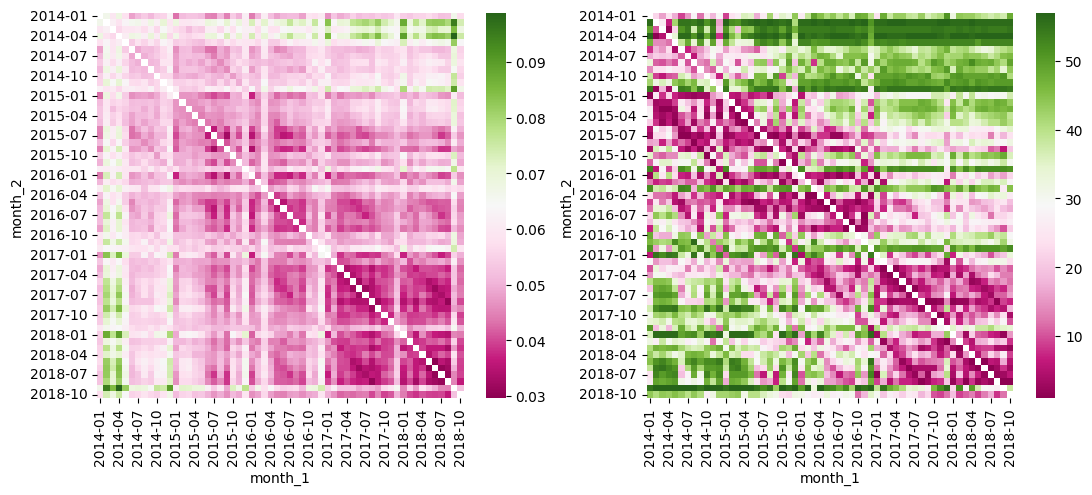

In [24]:
# for plotting purposes
long['jsd'] = long['jsd'].apply(lambda j: np.nan if j == 0 else j)
long['jsd_rank'] = long['jsd_rank'].apply(lambda j: np.nan if j == 0 else j)
fig, axes=plt.subplots(1, 2, figsize=(13, 5))
sns.heatmap(pd.DataFrame.pivot(long, index='month_2', columns='month_1', values='jsd'),cmap='PiYG', ax=axes[0])
sns.heatmap(pd.DataFrame.pivot(long, index='month_2', columns='month_1', values='jsd_rank'),cmap='PiYG', ax=axes[1])

## sample data (500,000 sentences)

<AxesSubplot: xlabel='month_1', ylabel='month_2'>

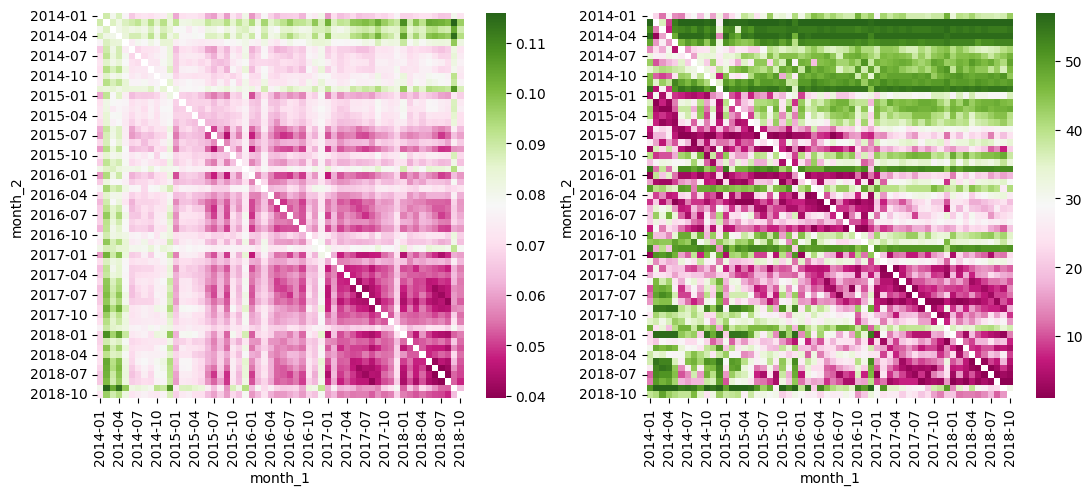

In [28]:
# sample

sample = pk.load(open(f"./data/samples/{subreddit}-comments.pk", "rb"))

ngrams_counter = ngrams.get_ngrams_counter(utts = sample)
months, dist, long = jsd.run(ngrams_counter)

long['jsd'] = long['jsd'].apply(lambda j: np.nan if j == 0 else j)
long['jsd_rank'] = long['jsd_rank'].apply(lambda j: np.nan if j == 0 else j)

fig, axes=plt.subplots(1, 2, figsize=(13, 5))
sns.heatmap(pd.DataFrame.pivot(long, index='month_2', columns='month_1', values='jsd'),cmap='PiYG', ax=axes[0])
sns.heatmap(pd.DataFrame.pivot(long, index='month_2', columns='month_1', values='jsd_rank'),cmap='PiYG', ax=axes[1])

## subsample data (50,000 sentences from sample data)

<AxesSubplot: xlabel='month_1', ylabel='month_2'>

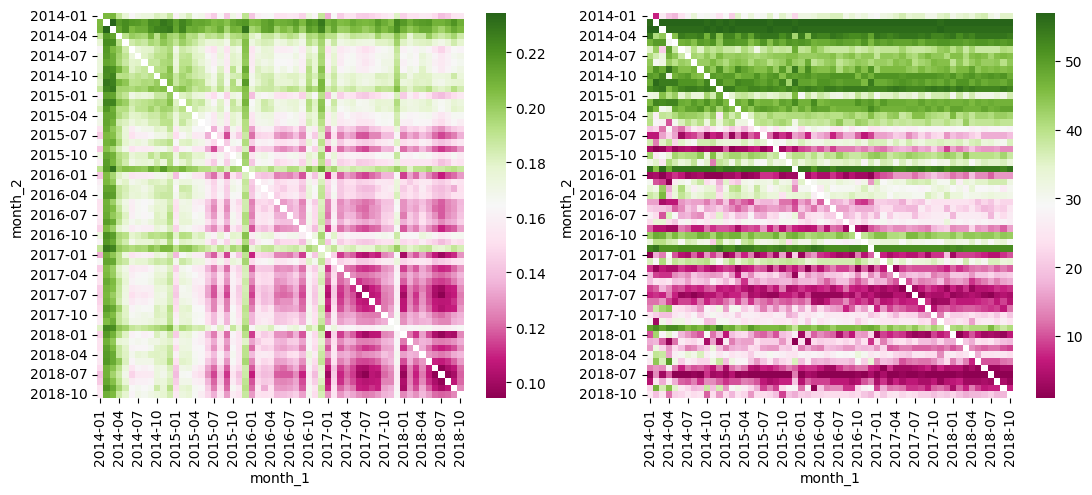

In [29]:
# with replacement subsample
sample_idx = np.random.choice(len(sample), size=50000, replace=True)
subsample = sample[sample_idx]
ngrams_counter = ngrams.get_ngrams_counter(utts = subsample)
months, dist, long = jsd.run(ngrams_counter)

long['jsd'] = long['jsd'].apply(lambda j: np.nan if j == 0 else j)
long['jsd_rank'] = long['jsd_rank'].apply(lambda j: np.nan if j == 0 else j)

fig, axes=plt.subplots(1, 2, figsize=(13, 5))
sns.heatmap(pd.DataFrame.pivot(long, index='month_2', columns='month_1', values='jsd'),cmap='PiYG', ax=axes[0])
sns.heatmap(pd.DataFrame.pivot(long, index='month_2', columns='month_1', values='jsd_rank'),cmap='PiYG', ax=axes[1])

<AxesSubplot: xlabel='month_1', ylabel='month_2'>

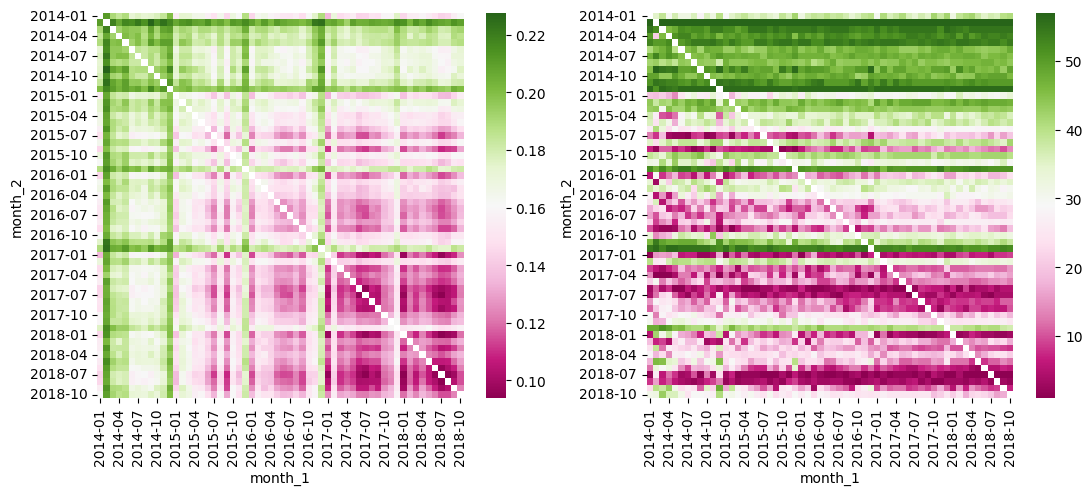

In [32]:
# without replacement subsample
sample_idx = np.random.choice(len(sample), size=50000, replace=False)
subsample = sample[sample_idx]
ngrams_counter = ngrams.get_ngrams_counter(utts = subsample)
months, dist, long = jsd.run(ngrams_counter)

long['jsd'] = long['jsd'].apply(lambda j: np.nan if j == 0 else j)
long['jsd_rank'] = long['jsd_rank'].apply(lambda j: np.nan if j == 0 else j)

fig, axes=plt.subplots(1, 2, figsize=(13, 5))
sns.heatmap(pd.DataFrame.pivot(long, index='month_2', columns='month_1', values='jsd'),cmap='PiYG', ax=axes[0])
sns.heatmap(pd.DataFrame.pivot(long, index='month_2', columns='month_1', values='jsd_rank'),cmap='PiYG', ax=axes[1])
